In [1]:
#!pip install snscrape

In [2]:
import snscrape.modules.twitter as sntwitter

In [3]:
import pandas as pd
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

In [4]:
tweets=[]

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:homeschooling').get_items()):
    if i>1000:
        break
    tweets.append([tweet.date,tweet.id,tweet.content,tweet.username])

In [5]:
df=pd.DataFrame(tweets,columns=["date","Tweet Id","Text","Username"])

In [6]:
df.head()

,date,Tweet Id,Text,Username
0,2023-01-31 04:44:23+00:00,1620281817264685058,@jason_howerton Look into what Arthur Robinson...,Homeschooling
1,2022-11-15 04:23:38+00:00,1592372729554284544,@quesara812 Geography. Our local library had b...,Homeschooling
2,2022-10-20 17:06:36+00:00,1583142653885308928,Thread…,Homeschooling
3,2022-10-19 10:11:05+00:00,1582675698539339778,@SummrWrites … independence. So really improve...,Homeschooling
4,2022-10-19 10:04:12+00:00,1582673965742706688,@SummrWrites … I don't mean to freak anyone ou...,Homeschooling


In [7]:
df.shape

(580, 4)

In [8]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [9]:
df2=df[["Text"]]

In [10]:
df2["sentiment"]=df2["Text"].apply(detect_sentiment)

In [11]:
df2.sentiment.value_counts()

 0.000000    156
 0.500000     24
 0.250000     23
 0.400000     18
 0.200000     14
            ... 
 0.077778      1
-0.333333      1
 0.133333      1
 0.716667      1
 0.002273      1
Name: sentiment, Length: 198, dtype: int64

In [12]:
df2["Text"]=df2["Text"].str.lower()

In [13]:
df2["Text"]=df2["Text"].str.replace('[^\w\s]','')

In [14]:
df2["Text"]=df2["Text"].str.replace('\d+','')

In [15]:
df2["Text"]=df2["Text"].str.replace('\n','').replace('\r','')

In [16]:
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [17]:
ls

Sentiment analysis - twitter tweets.ipynb
homesch.png


In [18]:
def wc (data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("homesch.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

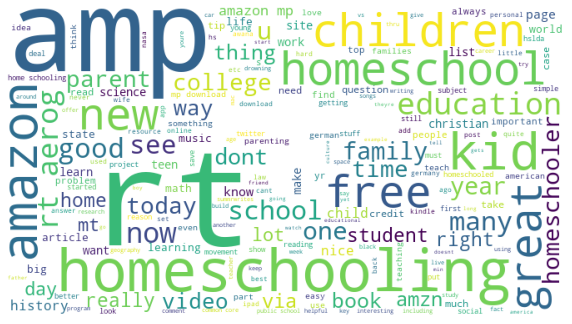

In [19]:
wc(df2.Text,'white')

In [20]:
df.head()

,date,Tweet Id,Text,Username
0,2023-01-31 04:44:23+00:00,1620281817264685058,@jason_howerton Look into what Arthur Robinson...,Homeschooling
1,2022-11-15 04:23:38+00:00,1592372729554284544,@quesara812 Geography. Our local library had b...,Homeschooling
2,2022-10-20 17:06:36+00:00,1583142653885308928,Thread…,Homeschooling
3,2022-10-19 10:11:05+00:00,1582675698539339778,@SummrWrites … independence. So really improve...,Homeschooling
4,2022-10-19 10:04:12+00:00,1582673965742706688,@SummrWrites … I don't mean to freak anyone ou...,Homeschooling


In [21]:
df.tail()

,date,Tweet Id,Text,Username
575,2008-03-29 00:04:52+00:00,778909440,NYTimes|Many Muslims Turn to Home Schooling - ...,Homeschooling
576,2008-03-28 23:00:57+00:00,778882933,CongressResearchSvc|The Law of Church & State:...,Homeschooling
577,2008-03-27 19:45:49+00:00,778166944,"WallStreetJournal|Editorial: ""home schooling i...",Homeschooling
578,2008-03-27 19:40:54+00:00,778164590,NewtGingrich|Big Win for Judicial Supremacy- C...,Homeschooling
579,2008-03-27 19:21:37+00:00,778155199,"New Twitter for homeschooling, college & other...",Homeschooling


In [22]:
df.isnull().sum()

date        0
Tweet Id    0
Text        0
Username    0
dtype: int64

In [23]:
def sentiment2(sent):
    if sent<-0.2:
        return 3
    elif sent>0.2:
        return 1
    else:
        return 0

In [24]:
 df2["sent"]=df2["sentiment"].apply(sentiment2)

In [25]:
df2.head()

,Text,sentiment,sent
0,jason_howerton look into what arthur robinson ...,0.414286,1
1,quesara geography our local library had books ...,-0.062500,0
2,thread,0.000000,0
3,summrwrites independence so really improves f...,0.283333,1
4,summrwrites i dont mean to freak anyone out t...,0.241295,1


In [26]:
import seaborn as sns 

<AxesSubplot:xlabel='sent', ylabel='count'>

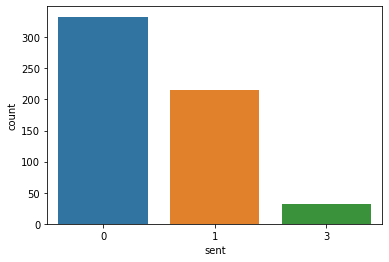

In [27]:
sns.countplot(x=df2.sent)

In [28]:
x=df2["Text"]
y=df2.sent

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [30]:
vect=CountVectorizer(stop_words="english")

In [31]:
x=vect.fit_transform(x)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.15)

In [33]:
mb=MultinomialNB()

In [34]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [35]:
accuracy_score(tahmin,y_test)

0.5517241379310345